# AuxTel Electronic Gain 
## Dependence with the Readout Board Temperature

Created on: May 18th, 2022
Author: Johnny Esteves

In [1]:
date = '18May22'
print(f'Running this code on {date}')

Running this code on 18May22


In [2]:
import sys, os, glob, time
import numpy as np
import astropy.io.fits as pf
import matplotlib.pyplot as plt
import lsst.daf.butler as dafButler

In [3]:
temp = np.load(f'data/temp_auxtel_20220316.npy')

In [4]:
temp

array([(20220502, 2022050200026, 2022050200027,  9.91071415, 0.        ,  9.93303585, 0.        ),
       (20220407, 2022040700048, 2022040700087, 16.55691946, 0.04767885, 16.56877792, 0.07302234),
       (20220406, 2022040600206, 2022040600245, 12.11045514, 0.11379463, 12.10973494, 0.07771168),
       (20220405, 2022040500131, 2022040500170, 16.45577574, 0.08309555, 16.46275139, 0.05607752),
       (20220317, 2022031700118, 2022031700158, 12.76326293, 1.67325789, 12.77351872, 1.67357991),
       (20220316, 2022031600179, 2022031600212, 12.66909247, 0.14313772, 12.67734828, 0.14145757)],
      dtype=[('day', '<i8'), ('exp1', '<i8'), ('exp2', '<i8'), ('t1', '<f8'), ('t1_err', '<f8'), ('t2', '<f8'), ('t2_err', '<f8')])

In [5]:
idx = np.argsort(temp['t1'])
run_names = ['T = %.2f'%ti for ti in list(temp['t1'][idx])]
run_names

['T = 9.91', 'T = 12.11', 'T = 12.67', 'T = 12.76', 'T = 16.46', 'T = 16.56']

In [6]:
exposures = list(temp['exp1'][idx])
exposures

[2022050200026,
 2022040600206,
 2022031600179,
 2022031700118,
 2022040500131,
 2022040700048]

In [7]:
days = list(temp['day'][idx])
butlers = []
for day in days:
    print(f"Collection: u/jesteves/latiss/ptc_tREB_{day}")
    butleri = dafButler.Butler("/repo/main", collections=["LATISS/raw/all","LATISS/calib", 
                                                          f"u/jesteves/latiss/ptc_tREB_{day}"])
    butlers.append(butleri)

Collection: u/jesteves/latiss/ptc_tREB_20220502
Collection: u/jesteves/latiss/ptc_tREB_20220406
Collection: u/jesteves/latiss/ptc_tREB_20220316
Collection: u/jesteves/latiss/ptc_tREB_20220317
Collection: u/jesteves/latiss/ptc_tREB_20220405
Collection: u/jesteves/latiss/ptc_tREB_20220407


In [8]:
data_list = []
for i,butler in enumerate(butlers):
    if i!=5:
        run_name = run_names[i]
        ptcDataset = cpCovs = butler.get('cpCovariances', exposure=exposures[i], detector=0, instrument='LATISS')
        gain_data = ptcDataset.gain
        gain_err_data = ptcDataset.gainErr
        amps = gain_data.keys()
        gains = []
        gain_err = []
        amp_nums = []
        for ii, amp in enumerate(amps):
            gains.append(gain_data[amp])
            gain_err.append(gain_err_data[amp])
            amp_nums.append(ii)
        data = dict()
        data['gain'] = gains
        data['gain_err'] = gain_err
        data['amps'] = amp_nums
        data_list.append(data)

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context('talk')
sns.set_style('whitegrid')

In [9]:
RAFT = 'RXX'
markers = ['o', 'x', 'P', '*', '^', 'v']

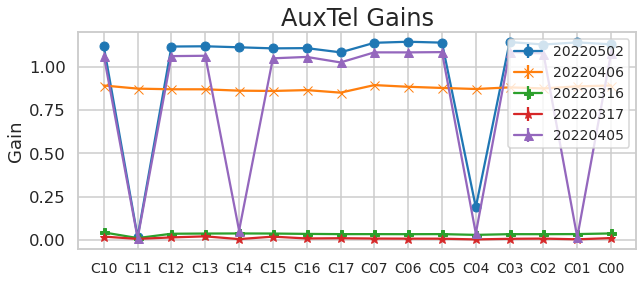

In [11]:
plt.figure(figsize=(10,4))
plt.title("AuxTel Gains", fontsize=24)
amp_nums = data['amps']
for i,data in enumerate(data_list):
    gains = data['gain']
    gain_err = data['gain_err']
    plt.errorbar(amp_nums, gains, yerr=gain_err, marker = markers[i], label = days[i])
    #plt.ylim(0.95, 1.4)
    plt.ylabel("Gain")
    plt.xticks(amp_nums,amps, fontsize=14)
    plt.legend(loc = 'upper right', fontsize = 14)

# plt.savefig(f'./plots/Gain_Summary_{date}.pdf',dpi=100)